## Assignment 3
#### Injamuri Krutika, M.Tech C.S, 18MCMT20


### Question 1:

#### a) K Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
def k_means_clustering(X, k, y):
    initial_centroids = X[np.random.choice(X.shape[0],k,replace = False)]
    centroids = initial_centroids.copy()
    distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    prev_minimum_dist_matrix = np.ones((centroids.shape[0],X.shape[0]))
    iterations = 0
    while(np.array_equal(minimum_dist_matrix, prev_minimum_dist_matrix) == False):
        iterations += 1
        prev_minimum_dist_matrix = np.copy(minimum_dist_matrix)
        minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        for i,centroid in enumerate(centroids):
            distance_matrix[i] = np.sqrt(np.sum((X-centroid)**2,axis=1))

        for i,j in enumerate(np.argmin(distance_matrix,axis=0)):
            minimum_dist_matrix[j][i] = 1

        for i in range(k):
            data_points = X[np.where(minimum_dist_matrix[i] == 1)]
            if data_points.size:
                centroids[i] = np.mean(data_points,axis = 0)
                
    print("Total Iterataions: ",iterations)
    return initial_centroids, centroids, np.array([X[minimum_dist_matrix[i] == 1] for i in range(k)]),\
            np.array([y[minimum_dist_matrix[i] == 1] for i in range(k)])

In [3]:
def plot_clusters(clusters, centroids_new,title):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c="r")
    ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c="g")
    if clusters.shape[0] == 3:
        ax.scatter(clusters[2][:, 0], clusters[2][:, 1], clusters[2][:, 2], c="b")
    ax.scatter(centroids_new[:, 0], centroids_new[:, 1], centroids_new[:, 2], c="m", marker="x")
    plt.title(title)
    plt.show()

### b) Iris Dataset

In [4]:
iris_dataset = np.genfromtxt("data/iris.csv",delimiter=",")
iris_dataset = iris_dataset[:,:4]
c1, c2, c3 = [0] * 50, [1] * 50, [2] * 50
y = np.array(c1 + c2 + c3)
pca = PCA(n_components=3)
pca.fit(iris_dataset)
iris_dataset = pca.transform(iris_dataset)
centroids_iris, centroids_new_iris, clusters_iris, y_iris = k_means_clustering(iris_dataset, 3, y)
print("Old Centroids: ",centroids_iris, sep="\n")
print("New Centroids: ",centroids_new_iris, sep="\n")


Total Iterataions:  4
Old Centroids: 
[[-2.469056    0.13788731  0.10126308]
 [ 2.31967279 -0.24554817 -0.34992218]
 [-2.68420713  0.32660731 -0.02151184]]
New Centroids: 
[[-2.4107173  -0.39626231 -0.04877788]
 [ 1.40541808 -0.05731672 -0.00301217]
 [-2.56366574  0.47149799  0.04551806]]


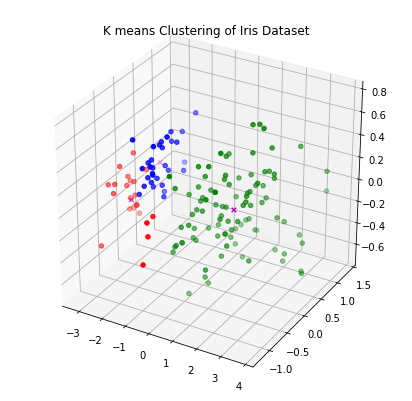

In [5]:
plot_clusters(clusters_iris, centroids_new_iris,"K means Clustering of Iris Dataset")

### c) 1. Cancer Dataset

In [6]:
file = open('data/arcene_train.data')
X = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])

file = open('data/arcene_train.labels')
y = np.array([int(file.readline().strip()) for _ in range(100)])

y[y == -1] = 0
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_std)
X_cancer= pca.transform(X_std)
centroids_cancer, centroids_new_cancer, clusters_cancer,y_cancer = k_means_clustering(X_cancer, 2, y)
print("Old Centroids: ",centroids_cancer, sep="\n")
print("New Centroids: ",centroids_new_cancer, sep="\n")


Total Iterataions:  5
Old Centroids: 
[[-48.19983782 -23.29887297   2.42939306]
 [-48.80106952 -10.8254401    8.69807006]]
New Centroids: 
[[ 55.98040236  -9.92193407   1.57410511]
 [-34.31056919   6.0811854   -0.9647741 ]]


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


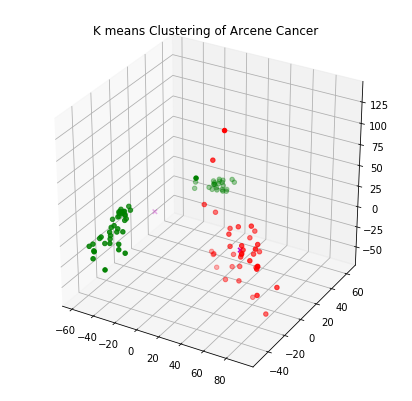

In [7]:
plot_clusters(clusters_cancer, centroids_new_cancer,"K means Clustering of Arcene Cancer")

### c) 2.Wine Data Set

In [8]:
file = open('data/wine.data')
X = np.array([list(map(float, file.readline().strip().split(','))) for _ in range(178)])
y = X[:,0]
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

scaler = StandardScaler()
X_std = scaler.fit_transform(X[:,1:])
pca = PCA(n_components=3)
pca.fit(X_std)
X_wine = pca.transform(X_std)
centroids_wine, centroids_new_wine, clusters_wine,y_wine = k_means_clustering(X_wine, 3, y.astype('uint8'))
print("Old Centroids: ",centroids_wine, sep="\n")
print("New Centroids: ",centroids_new_wine, sep="\n")



Total Iterataions:  10
Old Centroids: 
[[ 0.08253578  2.30623459 -0.46357499]
 [ 2.17195527 -2.32730534  0.83172987]
 [ 2.5108743  -0.91807096 -1.77096903]]
New Centroids: 
[[-0.23104063  1.82134758  0.24360512]
 [-2.72003575 -1.12565126 -0.23909324]
 [ 2.24048853 -0.73604842 -0.03204334]]


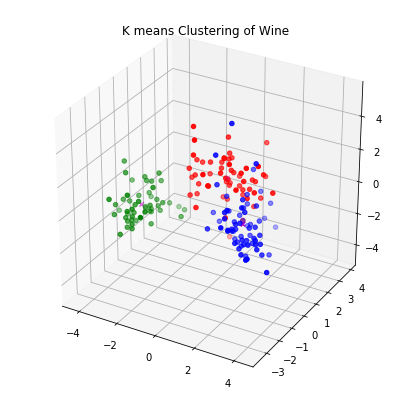

In [9]:
plot_clusters(clusters_wine, centroids_new_wine,"K means Clustering of Wine")

### Question 2: Internal Measures

#### RMSSTD:
- The root mean square standard deviation is  an  evaluation  method  used  to  measure  the equality of the clustering algorithm. The lower the value of RMSSTD, the better the separation of clusters.
- RMSSTD is a measure of homogeneity within clusters


  RMSSTD = $\sqrt{\frac{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}\displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2}{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}(n_{ij} -1 )}}$
  
where $k$ is the number of clusters,

$p$ is  the  number  of  independent  variables in dataset,

$x_{ij} $ is  the  mean  of  data  in  variable  j and cluster i, 

and $n_{ij}$ is  the  number  of  data  which  are  in variable p and cluster k.

#### R- Square:

- RS is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity.
- The R-squared value is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity.  If  RS  equals  zero,  then  there  is  no difference between the groups. 
- On the other hand, if RS equals one, then the partitioning of clusters is optimal

$RS = \frac{SS_t - SS_w}{SS_t}$

where $SS_t = \displaystyle\sum_{j=1}^{p} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{j}})^2 $

and $SS_w = \displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2 $


where $SS_t$ is  the  summation  of  the  distance squared among all variables,

$SS_w$ is  the  summation  of  the  distance squared among all data in the same cluster, 

$k$ is the number of clusters,

$p$ is the number of independent variables in the dataset,

$x_j$ is the mean of data in variable j,

$x_{ij}$ is the mean of the data in variable j and cluster i and 

$n_{ij}$ is  the  number  of  data  which  are  invariable p and cluster k.

In [10]:
def rmsstd(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
    numerator = np.sum(ssd)
    denominator = 0
    for i in range(k):
        for j in range(clusters[i][0].shape[1]):
            denominator += clusters[i][0].shape[0] - 1
    rmsstd_val = np.sqrt(numerator/denominator)
    return rmsstd_val

def rs(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    total_ssd = np.zeros(clusters.shape)
    
    means = []
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
        means.append(list(mean))
    ss_w = np.sum(ssd)
    total_mean = np.mean(means, axis = 0)
    for i in range(k):
        total_ssd[i] = np.sum((clusters[i][0] - total_mean)**2)
    ss_t = np.sum(total_ssd)
    
    rs_val = (ss_t - ss_w) / ss_t
    return rs_val

In [11]:
print("Iris Dataset - RMSSTD: ", rmsstd(clusters_iris.reshape(clusters_iris.shape[0],1)))
print("Iris Dataset - RS: ", rs(clusters_iris.reshape(clusters_iris.shape[0],1)))

Iris Dataset - RMSSTD:  0.5620830706277432
Iris Dataset - RS:  0.8433797163492809


In [12]:
print("Cancer Dataset - RMSSTD: ", rmsstd(clusters_cancer.reshape(clusters_cancer.shape[0],1)))
print("Cancer Dataset - RS: ", rs(clusters_cancer.reshape(clusters_cancer.shape[0],1)))
    

Cancer Dataset - RMSSTD:  25.29265829394243
Cancer Dataset - RS:  0.5279806006610025


In [13]:
print("Wine Dataset - RMSSTD: ", rmsstd(clusters_wine.reshape(clusters_wine.shape[0],1)))
print("Wine Dataset - RS: ", rs(clusters_wine.reshape(clusters_wine.shape[0],1)))
    

Wine Dataset - RMSSTD:  0.9894786178727465
Wine Dataset - RS:  0.6682811640878119


### Observations: 
- The RMSSTD value is less for Iris Dataset which means that the clustering for that dataset is pretty good.
- Whereas the RMSSTD value for Cancer is very high which indicates that it is very bad clustering. This is because the 10,000 variables is reduced to 3 variables.
- On the other hand, the RMSSTD value for Wine dataset is very much better compared to Cancer dataset.

- If RS = 1 then it indiates optimal clustering. Here it is observed that for Iris Dataset it is high and for Cancer Dataset it is low.

### Question 2: External Measures

Purity is a simple and transparent evaluation measure. Normalized mutual information can be information-theoretically interpreted. The Rand index penalizes both false positive and false negative decisions during clustering. The F measure in addition supports differential weighting of these two types of errors. 

#### Purity:
To compute purity , each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by $N$. Formally: 

$\mbox{purity}( \Omega,\mathbb{C} ) = \frac{1}{N} \sum_k \max_j \vert\omega_k \cap c_j\vert $

#### F-measure
F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

$F1 = 2.(\frac {precision . recall}{precision + recall})$

In [14]:
 def confusion_matrix(k, labels):
        cm = np.zeros((k, k), int)
        number_of_datapoints = np.sum([labels[i].size for i in range(k)])
        for i in range(k):
            counts = np.bincount(labels[i])
            target = np.argmax(counts)
            for label in labels[i]:
                cm[label, int(target)] += 1
        return cm

def precision(TP, FP):
    return np.around((TP/(TP+FP)),decimals=3)

def recall(TP, FN):
    return np.around((TP/(TP+FN)),decimals=3)


def f_measure(TP, FP, FN):
    precision_val = precision(TP, FP)
    recall_val = recall(TP, FN)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def cm_metrics(cm):
    FP, FN, TN = [], [], []
    for i in range(cm.shape[0]):
        FP.append(sum(cm[:,i]) - cm[i,i])
        FN.append(sum(cm[i,:]) - cm[i,i])
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    return np.diag(cm),FP, FN, TN


          
def purity(y, k, class_count):
    sum = 0
    for i in range(k):
        counts = np.bincount(y[i])
        label = np.argmax(counts)
        max_occurances = counts[label]
        sum += min(class_count[i], max_occurances)
    return sum / np.sum(class_count)




In [15]:
cm = confusion_matrix(3, y_iris)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_iris, 3, [50,50,50]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))


Confusion Matrix: 
[[50  0  0]
 [ 4  0 46]
 [ 0  0 50]]
Purity:  0.6666666666666666
F-Measure:  [0.9615784         nan 0.68507561]
Average F-Measure:  nan


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [16]:
cm = confusion_matrix(2, y_cancer)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_cancer, 2, [44,56]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix: 
[[28 28]
 [10 34]]
Purity:  0.62
F-Measure:  [0.59579628 0.64133838]
Average F-Measure:  0.618567330670464


In [17]:
cm = confusion_matrix(3, y_wine)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_wine, 3, [59,71, 48]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix: 
[[59  0  0]
 [ 9 59  3]
 [ 0  0 48]]
Purity:  0.8707865168539326
F-Measure:  [0.92933619 0.90770071 0.9696033 ]
Average F-Measure:  0.9355467319002727


### Question 3: Kernel K Means

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


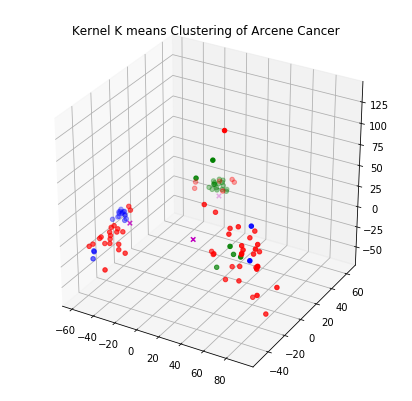

In [18]:
k = 3
clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(X_cancer)
# clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(iris_dataset[:100,:])

clusters = np.array([X_cancer[clustering == i] for i in range(k)])
centroids_new = np.array([np.mean(clusters[i],axis=0) for i in range(k)])
plot_clusters(clusters, centroids_new,"Kernel K means Clustering of Arcene Cancer")

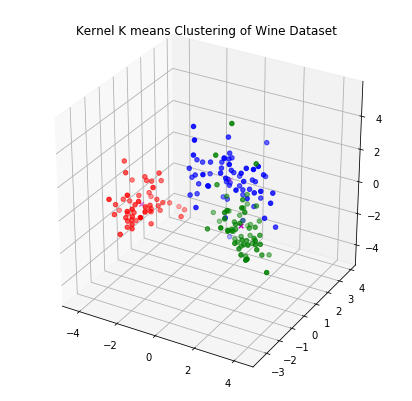

In [19]:
k = 3
clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(X_wine)
# clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(iris_dataset[:100,:])

clusters = np.array([X_wine[clustering == i] for i in range(k)])
centroids_new = np.array([np.mean(clusters[i],axis=0) for i in range(k)])
plot_clusters(clusters, centroids_new,"Kernel K means Clustering of Wine Dataset")

#### Observations:
-  When compared to the K means on Arcene Cancer dataset the results obtained by Kernel K means is not appealing. It does not create proper clustering. The reson may be the dimensionality reduction from 10,000 to 3 components.

- The clusters formed for Wine dataset using Kernel Kmeans and the normal K means is almost the same.